<a href="https://colab.research.google.com/github/bhava534/Capstone-Projects/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter Data Science Course/Python Module 1/Capstone Project 1 - Hotel Bookings/Hotel Bookings.csv")

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [ ]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [ ]:
df['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# So column "Company" has so many missing values we drop it from the dataset

## Cleaning data
Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: \

1. Handling missing values/Nan values \
2. Convert columns to appropriate datatypes. \
3. dropping unimportant columns

In [ ]:
df['company'].head(25)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18    110.0
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
Name: company, dtype: float64

In [ ]:
# In the company column most of the values are NaN so this column does not provide us more important information so we drop it from the dataset

In [ ]:
df.drop('company',axis = 1,inplace=True)

In [ ]:
df.head(5).T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [ ]:
# so here in our dataset , "Agent" and "company" columns have missing values so we replace those values 
# "Agent" column we have already drop it

In [ ]:
df['agent'].mode()

0    9.0
dtype: float64

In [ ]:
df['agent'].fillna(value = 9.0,inplace = True)

In [ ]:
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [ ]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
df['country'].fillna('others', inplace = True)

In [ ]:
df['children'].fillna(df['children'].mean(),inplace = True)

# Our data is completely clean now

In [ ]:
## Descriptive Statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103890,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


# Exploratory Data Analysis

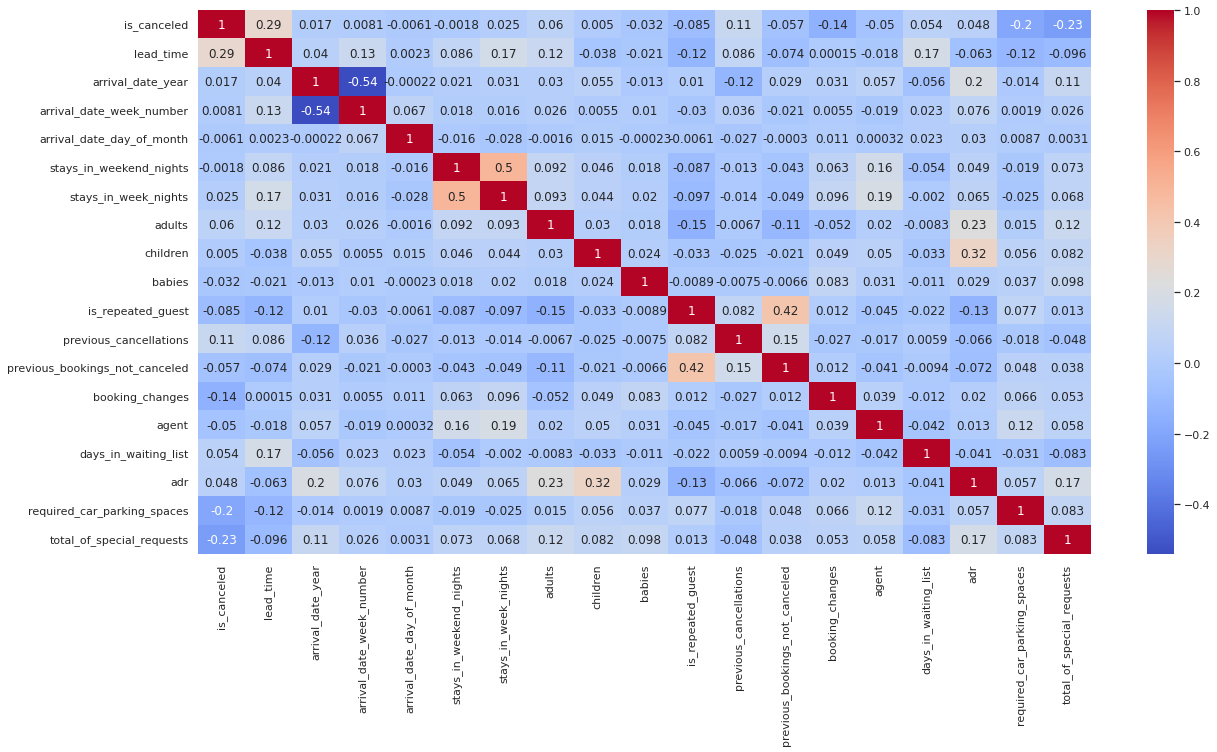

In [ ]:
# Correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

from the above heatmap it shows that number of booking cancelled is highly correlated with lead time 

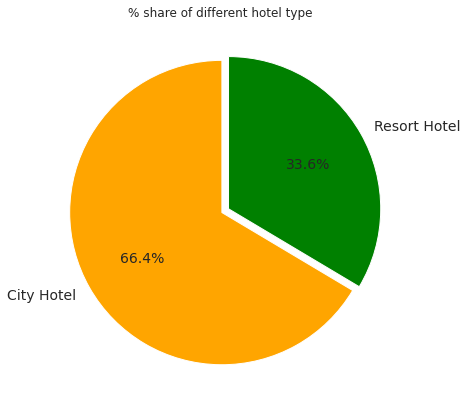

In [ ]:
## Pie chart
# Pie plot to show types of hotels.

fig = plt.figure(figsize =(10, 7))
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()
explode = (0, 0.05)
colors = ['orange', 'green']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90,textprops={'fontsize': 14})
plt.title('% share of different hotel type ')
plt.show()

city hotels are most preferred by guests thus city hotels has maximum bookings

#1. How many booking were cancelled in both type of hotels ?

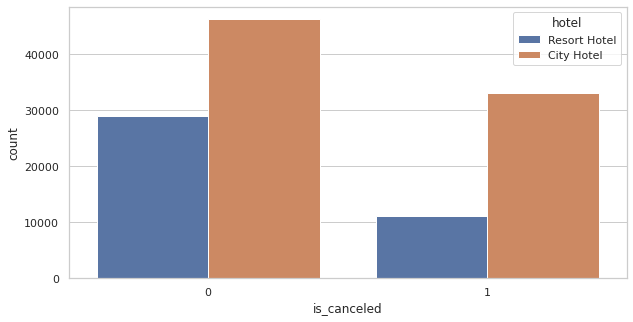

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="is_canceled", hue ='hotel',data=df)

In Resort hotel, booking cancellation is less as compared to City hotel. And overall booking cancellation is low.

#2.Which type of peoples/guests are comfortable to live in hotels?

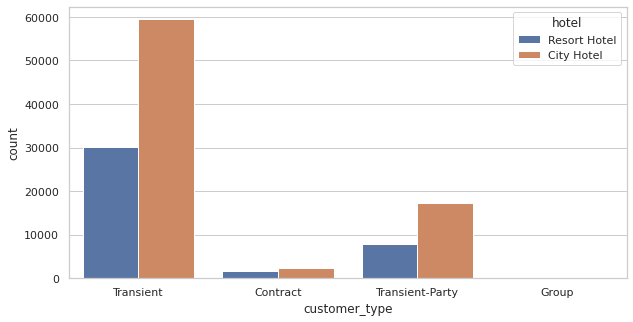

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="customer_type",hue = 'hotel',data=df)

#3.In which month there is a huge number of guests stays in hotel?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


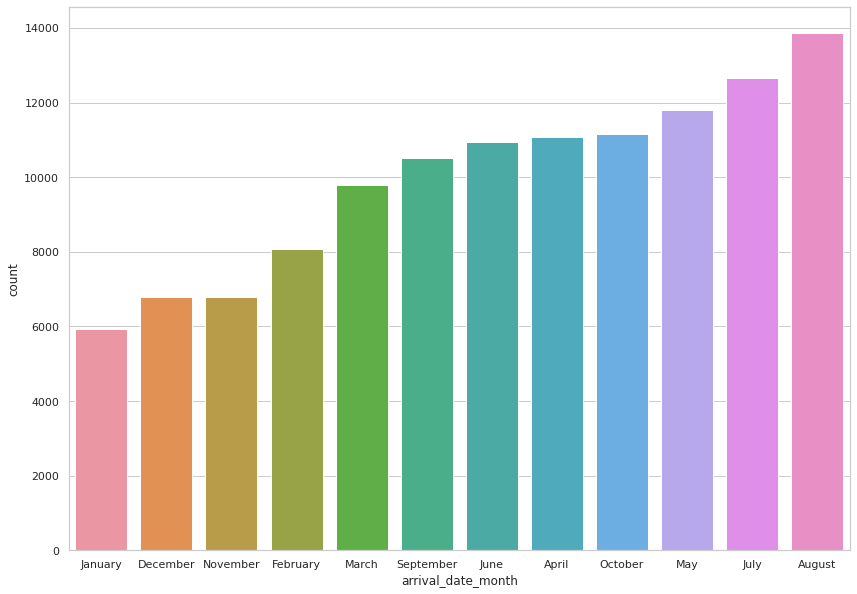

In [ ]:
plt.figure(figsize= (14,10))

adm = sns.countplot(df['arrival_date_month'], order = df['arrival_date_month'].value_counts().sort_values(ascending=True).index)

so from this countplot we can say that in the month of August huge number of guests are arrived

#4.What is the total stays duration in the hotel?

In [ ]:
df['stays'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [ ]:
df['stays'].max()

69

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


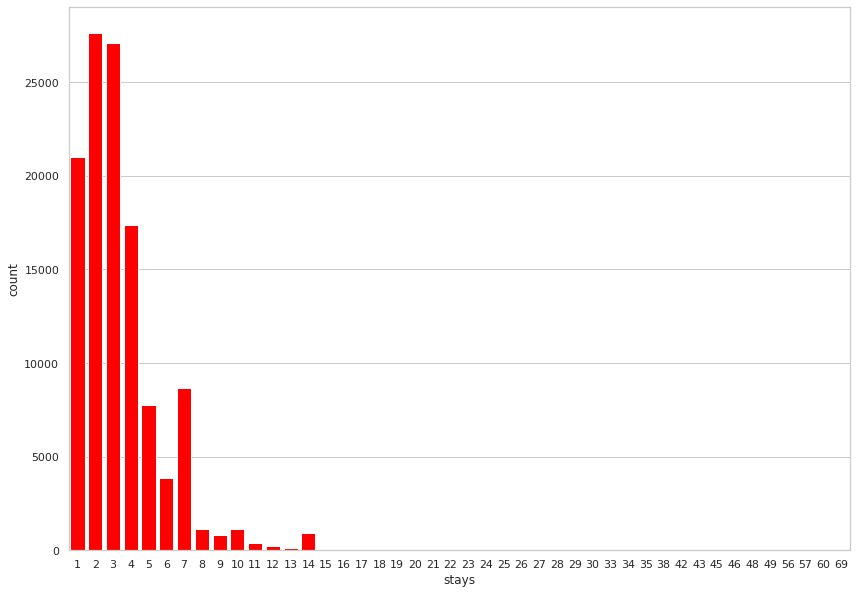

In [ ]:
plt.figure(figsize= (14,10))
sns.countplot(df[df['stays'] != 0]['stays'], facecolor='red')

#5. Which month is the most occupied and which is the least occupied?

In [ ]:
# value_counts counts the number of times each values has appeared

(df.arrival_date_month.value_counts(normalize=True))*100

August       11.623252
July         10.604741
May           9.876037
October       9.347517
April         9.288048
June          9.162409
September     8.801407
March         8.203367
February      6.757685
November      5.690594
December      5.678868
January       4.966078
Name: arrival_date_month, dtype: float64

In [ ]:
month_df = df[df['is_canceled']==0]['arrival_date_month'].value_counts().reset_index().rename(columns = {'index':'month','arrival_date_month':'number_of_bookings'})
month_df

,month,number_of_bookings
0,August,8638
1,July,7919
2,May,7114
3,October,6914
4,March,6645
5,April,6565
6,June,6404
7,September,6392
8,February,5372
9,November,4672


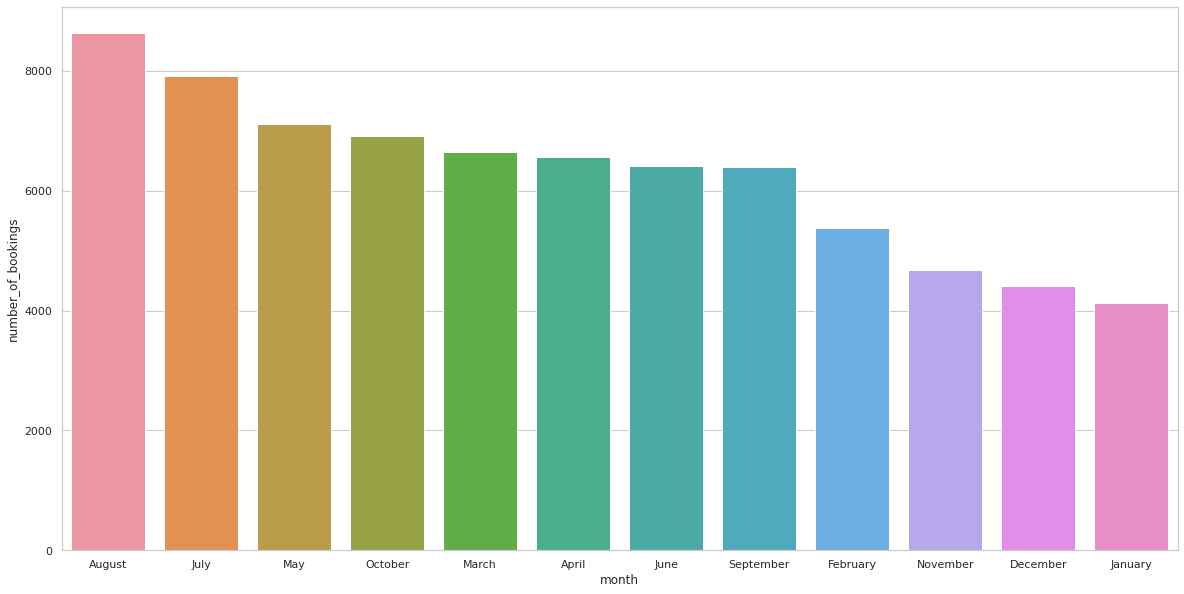

In [ ]:
# Barplot of number of bookings in each month

plt.figure(figsize=(20,10))
ax = sns.barplot(x="month", y="number_of_bookings", data = month_df)

In [ ]:
month_hotel_type = df[df['is_canceled']==0].groupby(['arrival_date_month','hotel'])['hotel'].count().unstack()
month_hotel_type

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,4015,2550
August,5381,3257
December,2392,2017
February,3064,2308
January,2254,1868
July,4782,3137
June,4366,2038
March,4072,2573
May,4579,2535


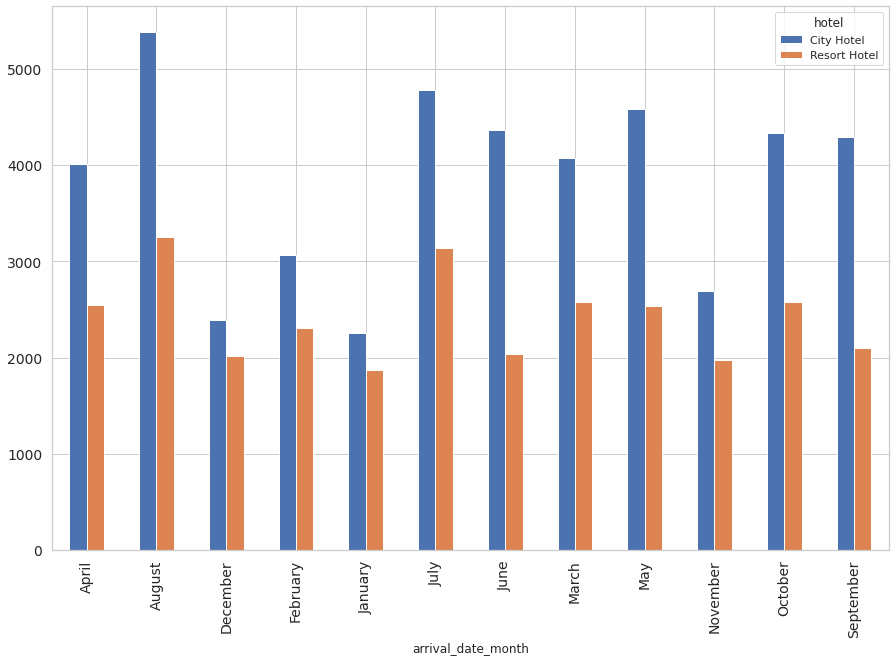

In [ ]:
# Barplot of number of bookings in each month for both hotels.

ax = month_hotel_type.plot.bar(figsize = (15,10),fontsize = 14)

#6.From which countries maximum number of guests are coming?

In [ ]:
# Value count of top 10 countries from where maximum number of bookings happened

Top_10_countries= df[df['is_canceled']==0]['country'].value_counts()[:10]
Top_10_countries= Top_10_countries.reset_index().rename(columns={'index':'country','country':'number of bookings'})
Top_10_countries['percentage']=(Top_10_countries['number of bookings']/Top_10_countries['number of bookings'].sum())*100
Top_10_countries

,country,number of bookings,percentage
0,PRT,21071,34.070661
1,GBR,9676,15.645566
2,FRA,8481,13.713316
3,ESP,6391,10.333899
4,DEU,6069,9.813243
5,IRL,2543,4.111893
6,ITA,2433,3.934029
7,BEL,1868,3.020454
8,NLD,1717,2.776296
9,USA,1596,2.580645


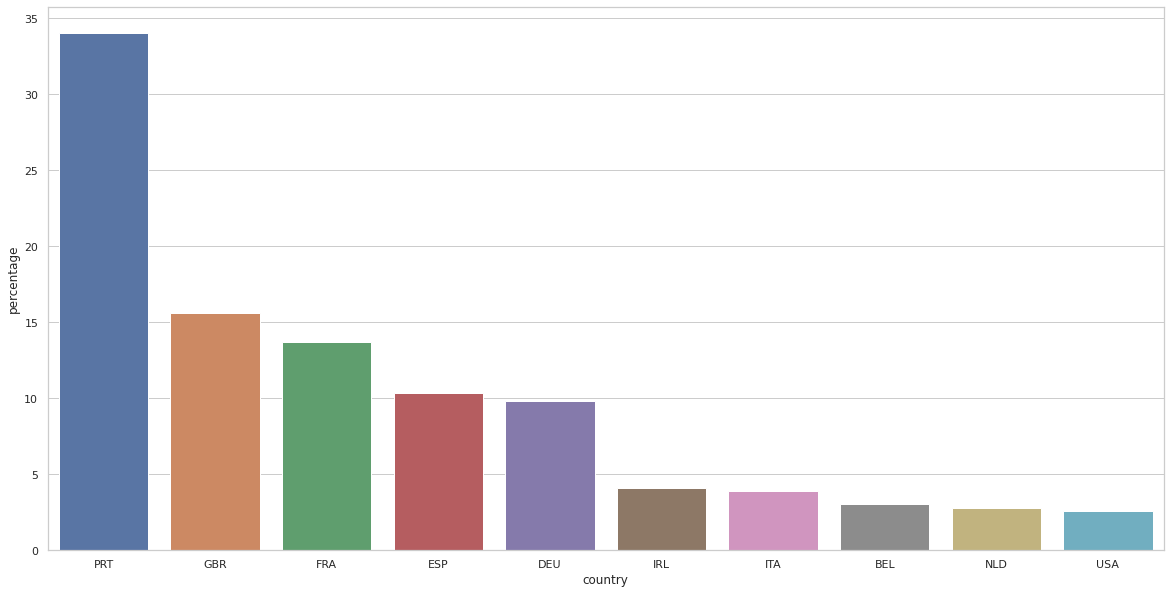

In [ ]:
# Bar plot of Top_10_countries 
plt.figure(figsize=(20,10))
Bar_plot=sns.barplot(x='country',y='percentage',data=Top_10_countries)

More visitors are from western europe, namely Portugal,France, Great Britain and Spain being the highest. Maximum from Portugal and Minimum from United States Of America

#7. What is preferred stay in each hotel?

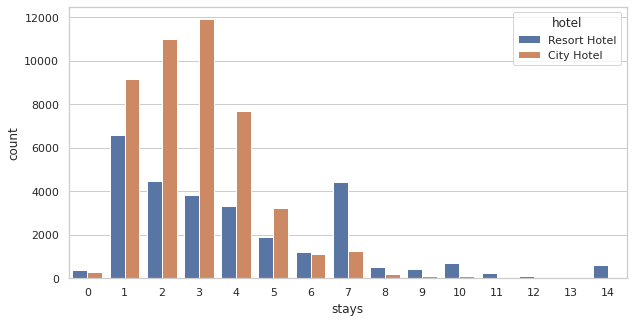

In [ ]:
not_canceled = df[df['is_canceled'] == 0]
s1 =not_canceled[not_canceled['stays'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['stays'], hue = s1['hotel'])
plt.show()

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred

# plot a pie chart to show % of repeated guests

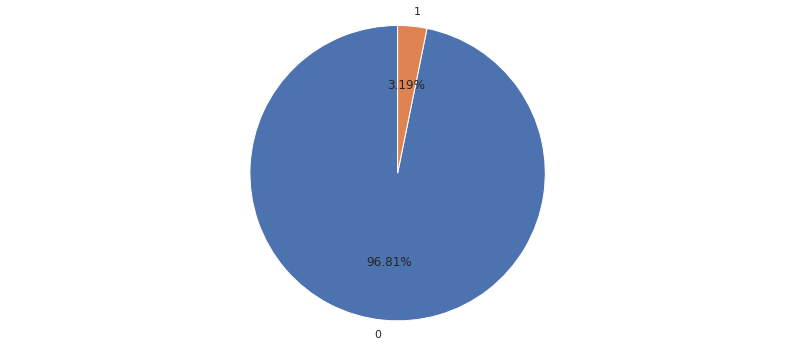

In [ ]:
plot_pie_chart_from_column(df, 'is_repeated_guest')

In [ ]:
# get count of each unique from from a particular column 
# and output its as a dataframe
def get_count_from_column(df, column_label):
  df_grpd = df[column_label].value_counts()
  df_grpd = pd.DataFrame({'index':df_grpd.index, 'count':df_grpd.values})
  return df_grpd

def plot_pie_chart_from_column(df, column_label):
  df_grpd = get_count_from_column(df, column_label)

  fig, ax = plt.subplots(figsize=(14, 6))
  ax.pie(df_grpd.loc[:, 'count'], labels=df_grpd.loc[:, 'index'], autopct='%1.2f%%', startangle=90)
  ax.axis('equal')
  plt.show()

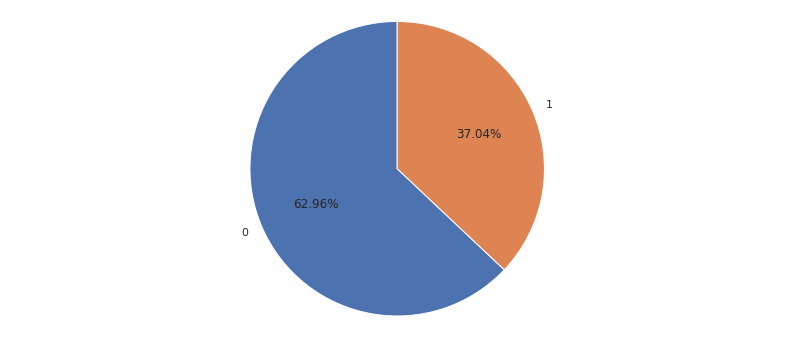

In [ ]:
# plot a pie chart to show % of cancelled bookings
plot_pie_chart_from_column(df, 'is_canceled')

We can see that around one-fourth of the total bookings get cancelled.

#9. Which is Most demandding Meal Type ?


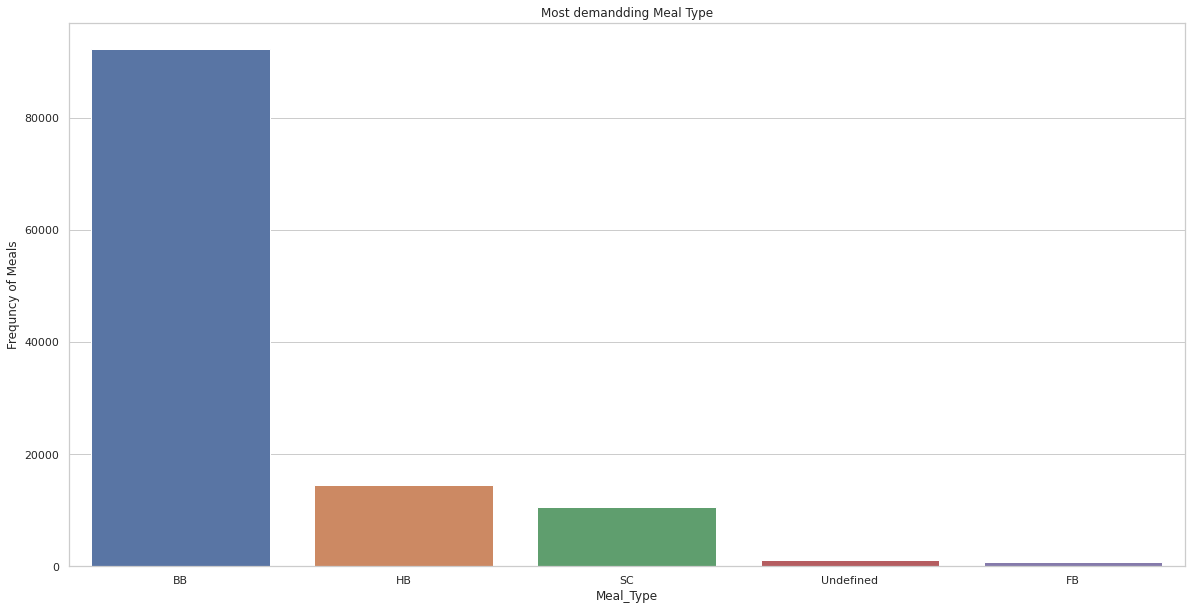

In [ ]:
Most_Preferred_meal=df['meal'].value_counts().reset_index().rename(columns={'index':'Meal_Type','meal':'Frequncy of Meals'})
Most_Preferred_meal
plt.figure(figsize=(20,10))
plt.title('Most demandding Meal Type')
ax = sns.barplot(x="Meal_Type", y="Frequncy of Meals", data =Most_Preferred_meal )

Types of meal in hotels: \
 \
1) BB - (Bed and Breakfast) \
2) HB- (Half Board) \
3) FB- (Full Board) \
4) SC- (Self Catering)